In [2]:
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
data = pd.read_csv('D:\Downloads\jerry\data\Reviews.csv')
data = data[:10000]

# 1.Top 10 Reviewer

In [3]:
data_groupby = data.groupby(["UserId","ProfileName"])
data_groupby_mean = data_groupby.mean()

data_groupby_score_count = data_groupby.size()
data_groupby_score_count.name = "Score count"

data_groupby_score_mean = data_groupby_mean["Score"]
data_groupby_score_mean.name = "Score mean"

NewFrame = pd.DataFrame(data_groupby_score_count)
NewFrame["Score mean"] = data_groupby_score_mean
result = NewFrame.sort_values(by = ['Score count'],ascending = 0)
result.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


# 2.Plot score distribution for the user with the most number of reviews

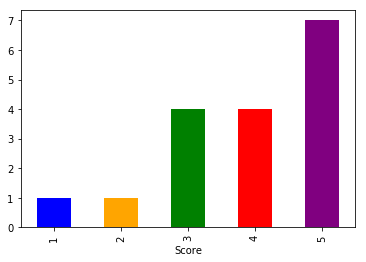

In [4]:
Top_reviewer = result.index[0]
Top_reviewer_data = data_groupby.get_group(Top_reviewer)
Top_reviewer_Scorecount = Top_reviewer_data.set_index(["UserId","Score"])
Top_reviewer_Scorecount = Top_reviewer_Scorecount.count(level = "Score")
Top_reviewer_Scorecount.plot.bar(y = "ProfileName", color=(["blue", "orange", "green", "red", "purple"]),legend=None)

# 3.Plot pandas Series DataFrame (Time->Date)

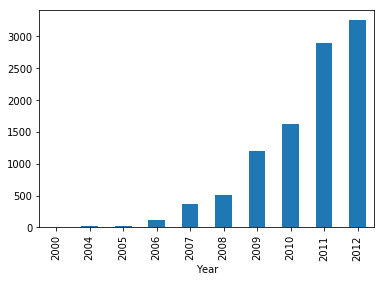

In [5]:
data_time = data.copy()
data_time["Year"] = pd.to_datetime(data['Time'], unit="s").apply(lambda x: x.year)
data_year = data_time.groupby("Year").size()
data_year = pd.DataFrame(data_year)
data_year.plot.bar(legend = None)

# 4.Plot HeatMap using seaborn

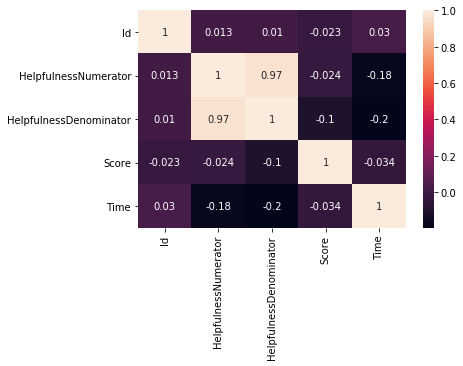

In [19]:
data_drop = data.drop(columns = ["UserId", "ProductId", "ProfileName", "Summary", "Text"])
data_corr = data_drop[data_drop.columns].astype(float).corr()
sns.heatmap(data_corr, annot=True)

# 5.Helpful percent

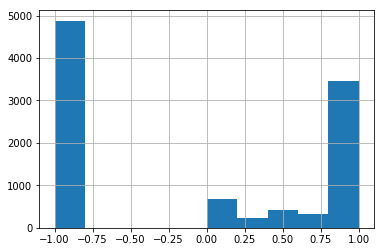

In [18]:
data_copy = data.copy()
data_help = data_copy[data_copy["HelpfulnessNumerator"] <= data_copy["HelpfulnessDenominator"]]
data_help_percent = data_help["HelpfulnessNumerator"].div(data_help.HelpfulnessDenominator)
data_help_percent.fillna(-1).hist()